# Task

-- create a reinforcement learning agent for price prediction
* import dependencies 
* import dataset 
* define agent algorhythm
* make prediction
* plot prediction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# gDrive
from google.colab import drive
drive.mount('/drive', force_remount=True)
%cd "/drive/My Drive/mmwml/W2 - Finance"

# Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

# Modeling Metrics
from sklearn import metrics

Mounted at /drive
/drive/My Drive/mmwml/W2 - Finance
Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [0]:
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()

df_full.to_csv('JPM.csv', index=False)

df_full.head(10)

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,107.629997,108.019997,106.809998,107.949997,103.156837,13578800
1,2018-01-03,107.860001,108.489998,107.480003,108.059998,103.261963,11901000
2,2018-01-04,108.360001,110.029999,108.199997,109.040001,104.741249,12953700
3,2018-01-05,109.260002,109.550003,107.779999,108.339996,104.068840,14155000
4,2018-01-08,108.150002,108.680000,107.699997,108.500000,104.222534,12466500
5,2018-01-09,108.720001,109.629997,108.489998,109.050003,104.750862,13292300
6,2018-01-10,109.470001,110.699997,109.389999,110.250000,105.903542,15834500
7,2018-01-11,110.669998,110.930000,110.050003,110.839996,106.470284,13676800
8,2018-01-12,111.650002,112.849998,110.839996,112.669998,108.228134,18884200
9,2018-01-16,111.510002,113.430000,111.070000,112.269997,107.843910,22703300


In [0]:
df_full.shape

(424, 7)

In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02
mean,109.654151,110.615424,108.686132,109.637642,107.215938,1.401067e+07
std,4.985261,4.909459,5.064402,4.988823,4.796156,5.145405e+06
min,92.690002,94.220001,91.110001,92.139999,90.066071,6.488400e+06
25%,106.415001,107.254998,105.132500,106.355000,103.926346,1.036032e+07
50%,110.005001,111.075001,108.970001,109.989998,107.685112,1.303090e+07
75%,113.760000,114.645000,112.987501,113.844997,110.711656,1.611082e+07
max,119.129997,119.330002,118.080002,118.769997,116.830002,4.131390e+07


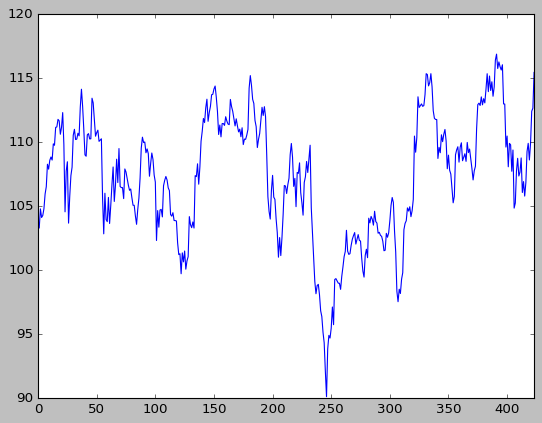

In [0]:
df_full["Adj Close"].plot()

In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,107.629997,108.019997,106.809998,107.949997,103.156837,13578800
2018-01-03,107.860001,108.489998,107.480003,108.059998,103.261963,11901000
2018-01-04,108.360001,110.029999,108.199997,109.040001,104.741249,12953700
2018-01-05,109.260002,109.550003,107.779999,108.339996,104.068840,14155000
2018-01-08,108.150002,108.680000,107.699997,108.500000,104.222534,12466500


In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
# Split data for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
 
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

# Baseline

In [0]:
y_pred_base = np.roll(y_test, 1)

In [0]:
get_performance(y_pred_base)

Mean Absolute Error: 5.4067
Mean Squared Error: 45.6002
Root Mean Squared Error: 6.7528


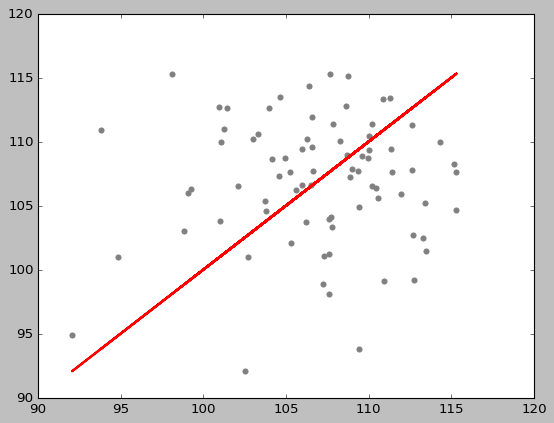

In [0]:
get_plot(y_pred_base)

# Linear Regression

In [0]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr = model_lr.predict(X_test)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 1.1863
Mean Squared Error: 2.3715
Root Mean Squared Error: 1.54


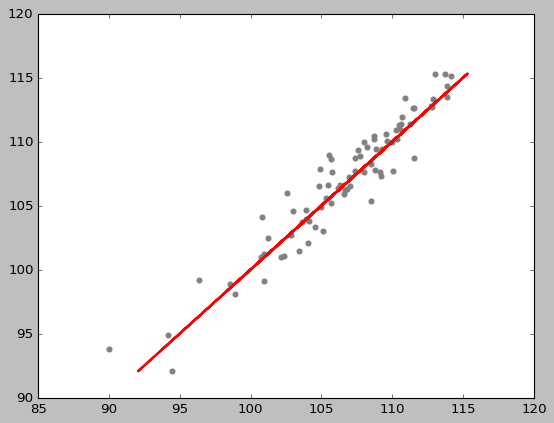

In [0]:
get_plot(y_pred_lr)

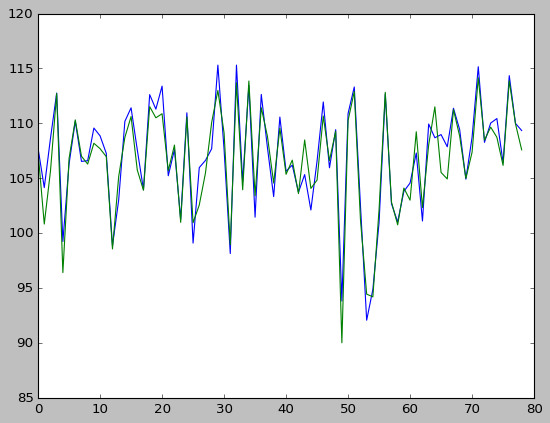

In [0]:
plt.plot(y_test)
plt.plot(y_pred_lr)

# Gradient Boosting

In [0]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_gb = model_gb.predict(X_test)

In [0]:
get_performance(y_pred_gb)

Mean Absolute Error: 1.2231
Mean Squared Error: 2.4323
Root Mean Squared Error: 1.5596


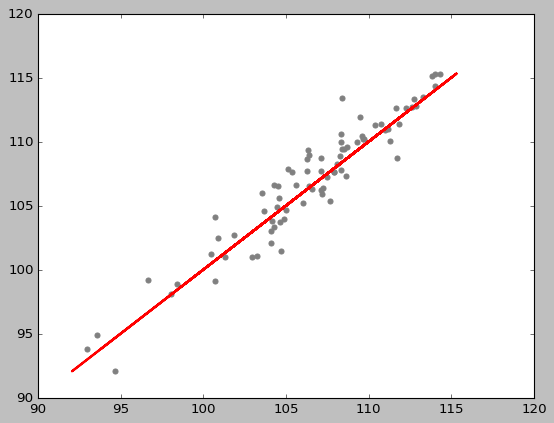

In [0]:
get_plot(y_pred_gb)

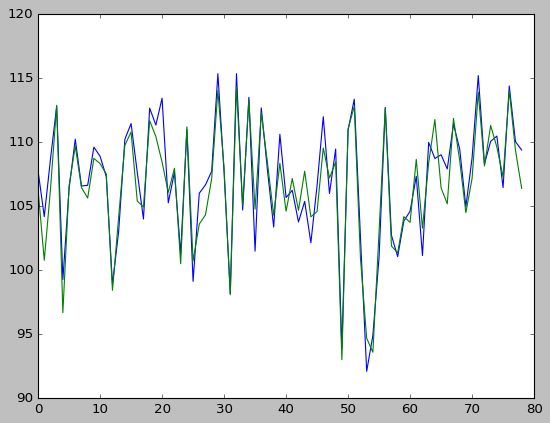

In [0]:
plt.plot(y_test)
plt.plot(y_pred_gb)

# Random Forest

In [0]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred_rf = model_rf.predict(X_test)

In [0]:
get_performance(y_pred_rf)

Mean Absolute Error: 1.1856
Mean Squared Error: 2.2426
Root Mean Squared Error: 1.4975


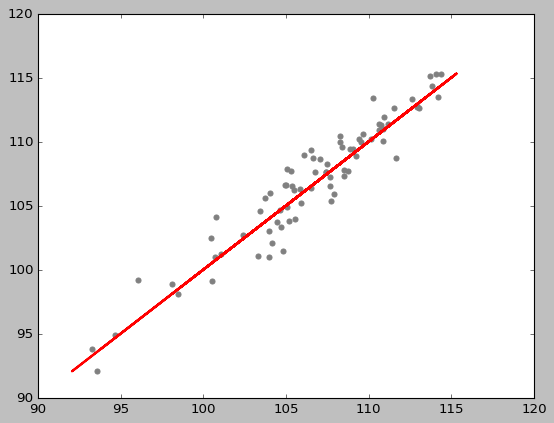

In [0]:
get_plot(y_pred_rf)

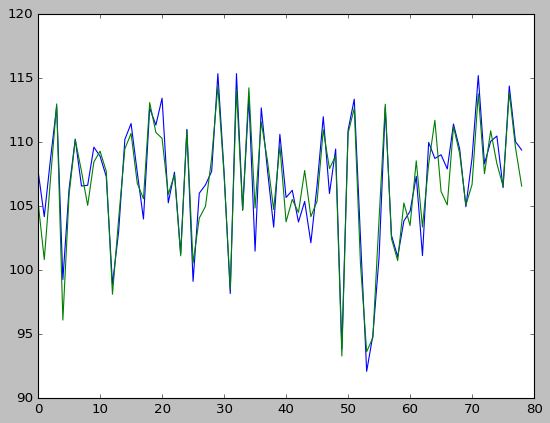

In [0]:
plt.plot(y_test)
plt.plot(y_pred_rf)

# Compare 

(9, 20)

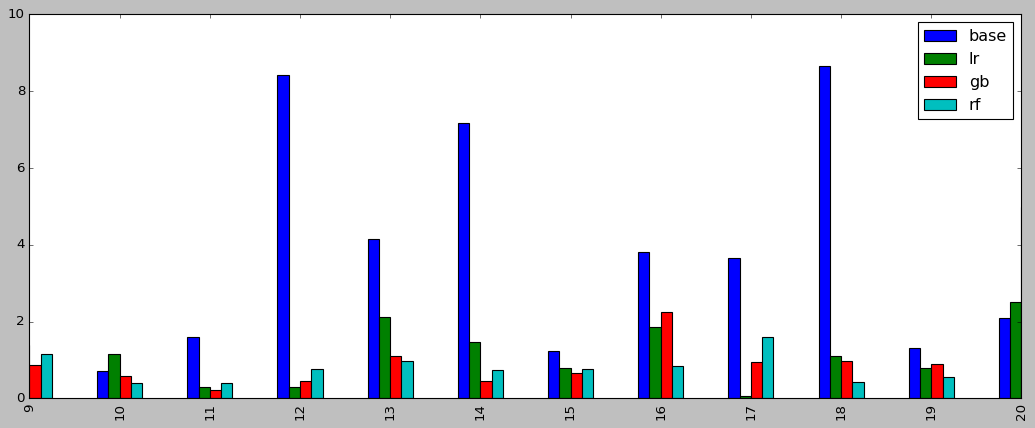

In [0]:
df_comp=pd.DataFrame({"base":np.absolute(y_test-y_pred_base), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "gb":np.absolute(y_test-y_pred_gb),
              "rf":np.absolute(y_test-y_pred_rf)})

df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)